In [3]:
import pandas as pd
df= pd.read_csv('DS_Bitácora_19_Data_con_VF.csv')

In [2]:
df.head()

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357


In [3]:
df.isnull().sum()

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64

In [4]:
df.describe()

,V2,V3,V4,V5
count,1341.000000,1396.000000,1087.000000,1382.000000
mean,0.500373,999.686269,196.414056,2395.781409
std,0.500186,24.099044,8.986208,131.714318
min,0.000000,916.828247,166.654303,2005.861180
25%,0.000000,984.023781,190.708818,2306.219362
50%,1.000000,999.385885,196.753671,2397.870540
75%,1.000000,1015.946214,202.423761,2480.880485
max,1.000000,1082.767001,225.195704,2866.799351


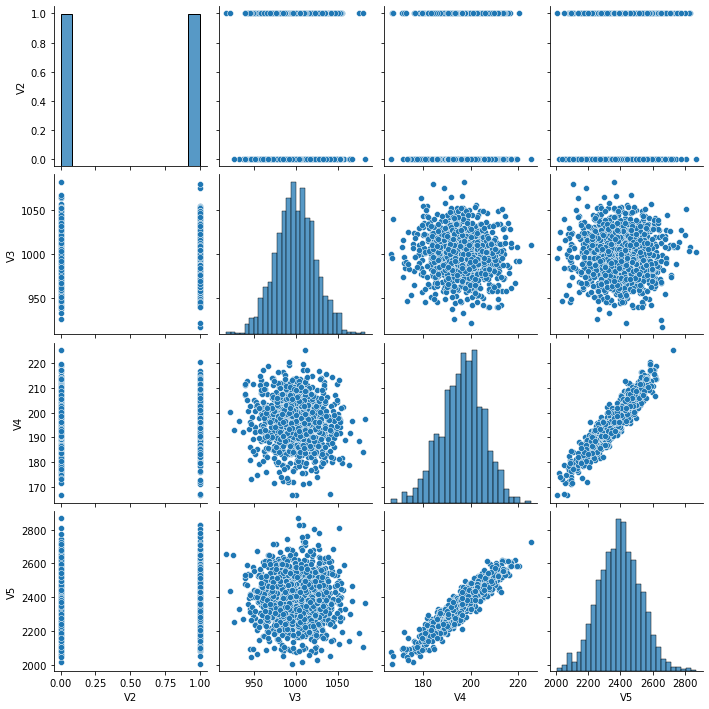

In [10]:
import seaborn as sns
sns.pairplot(data=df)

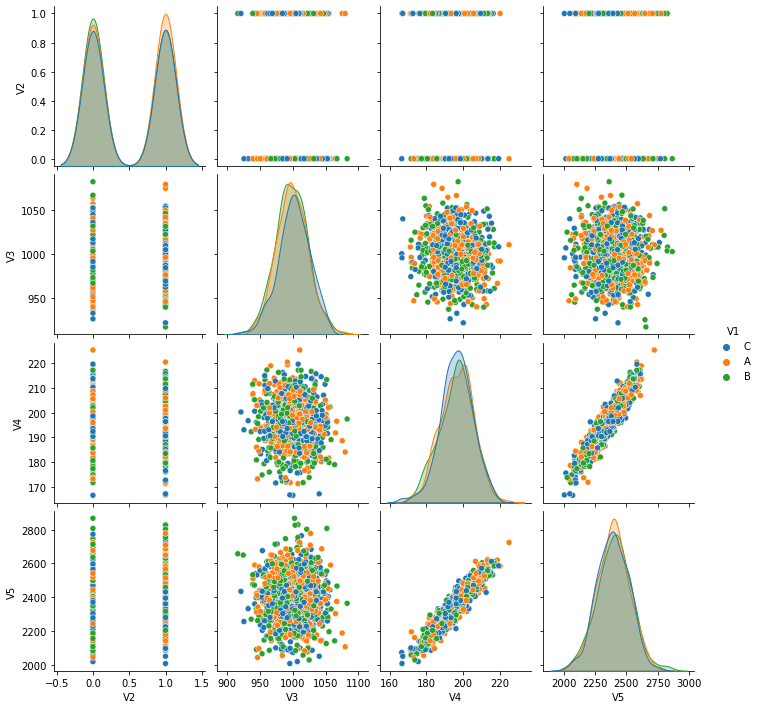

In [6]:
sns.pairplot(data=df,hue='V1')

In [7]:
df.V2.isnull().groupby([df['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,39
1,B,52
2,C,68


In [8]:
df.V3.isnull().groupby([df['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,30
1,B,0
2,C,74


In [9]:
df.V4.isnull().groupby([df['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,139
1,B,147
2,C,127


In [10]:
df.V5.isnull().groupby([df['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,34
1,B,44
2,C,40


MNAR

In [11]:
df['V4-intervalos'] = pd.cut(df.V4, bins  = 15)
df

,V1,V2,V3,V4,V5,V4-intervalos
0,C,1.0,986.175237,184.258917,2224.638050,"(182.265, 186.168]"
1,C,1.0,994.130276,NaN,2570.213101,NaN
2,A,1.0,985.782622,196.893581,2309.238832,"(193.974, 197.876]"
3,A,1.0,1029.464887,192.063247,2349.259233,"(190.071, 193.974]"
4,A,1.0,1004.357092,NaN,2474.036357,NaN
...,...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694,"(190.071, 193.974]"
1496,C,0.0,991.730134,193.553401,2277.045998,"(190.071, 193.974]"
1497,B,0.0,1032.150519,NaN,2347.760632,NaN
1498,C,1.0,984.522924,196.373516,2393.847484,"(193.974, 197.876]"


In [12]:
vf_V4V5 = df.V5.isnull().groupby([df['V4-intervalos']]).sum().astype(int).reset_index(name='count')
vf_V4V5

,V4-intervalos,count
0,"(166.596, 170.557]",0
1,"(170.557, 174.46]",0
2,"(174.46, 178.363]",1
3,"(178.363, 182.265]",2
4,"(182.265, 186.168]",5
5,"(186.168, 190.071]",6
6,"(190.071, 193.974]",17
7,"(193.974, 197.876]",12
8,"(197.876, 201.779]",20
9,"(201.779, 205.682]",13


In [13]:
vf_V4V5['freq'] = vf_V4V5['count']/df.groupby([df['V4-intervalos']]).count()['V4'].values
vf_V4V5

,V4-intervalos,count,freq
0,"(166.596, 170.557]",0,0.000000
1,"(170.557, 174.46]",0,0.000000
2,"(174.46, 178.363]",1,0.062500
3,"(178.363, 182.265]",2,0.051282
4,"(182.265, 186.168]",5,0.060976
5,"(186.168, 190.071]",6,0.063830
6,"(190.071, 193.974]",17,0.104938
7,"(193.974, 197.876]",12,0.065217
8,"(197.876, 201.779]",20,0.109290
9,"(201.779, 205.682]",13,0.084416


In [14]:
vf_V4V5["bin_centres"] = vf_V4V5["V4-intervalos"].apply(lambda x: x.mid)
vf_V4V5

,V4-intervalos,count,freq,bin_centres
0,"(166.596, 170.557]",0,0.000000,168.5765
1,"(170.557, 174.46]",0,0.000000,172.5085
2,"(174.46, 178.363]",1,0.062500,176.4115
3,"(178.363, 182.265]",2,0.051282,180.3140
4,"(182.265, 186.168]",5,0.060976,184.2165
5,"(186.168, 190.071]",6,0.063830,188.1195
6,"(190.071, 193.974]",17,0.104938,192.0225
7,"(193.974, 197.876]",12,0.065217,195.9250
8,"(197.876, 201.779]",20,0.109290,199.8275
9,"(201.779, 205.682]",13,0.084416,203.7305


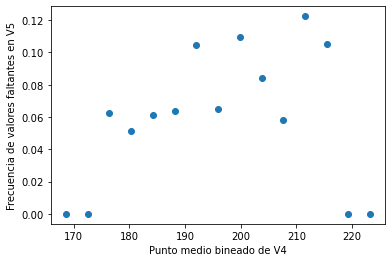

In [15]:
import matplotlib.pyplot as plt
plt.scatter(vf_V4V5['bin_centres'], vf_V4V5['freq'])
plt.xlabel('Punto medio bineado de V4')
plt.ylabel('Frecuencia de valores faltantes en V5')
plt.show()

In [16]:
df['V5-intervalos'] = pd.cut(df.V5, bins  = 15)
df

,V1,V2,V3,V4,V5,V4-intervalos,V5-intervalos
0,C,1.0,986.175237,184.258917,2224.638050,"(182.265, 186.168]","(2178.049, 2235.445]"
1,C,1.0,994.130276,NaN,2570.213101,NaN,"(2522.424, 2579.82]"
2,A,1.0,985.782622,196.893581,2309.238832,"(193.974, 197.876]","(2292.841, 2350.236]"
3,A,1.0,1029.464887,192.063247,2349.259233,"(190.071, 193.974]","(2292.841, 2350.236]"
4,A,1.0,1004.357092,NaN,2474.036357,NaN,"(2465.028, 2522.424]"
...,...,...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694,"(190.071, 193.974]","(2292.841, 2350.236]"
1496,C,0.0,991.730134,193.553401,2277.045998,"(190.071, 193.974]","(2235.445, 2292.841]"
1497,B,0.0,1032.150519,NaN,2347.760632,NaN,"(2292.841, 2350.236]"
1498,C,1.0,984.522924,196.373516,2393.847484,"(193.974, 197.876]","(2350.236, 2407.632]"


In [17]:
vf_V5V4 = df.V4.isnull().groupby([df['V5-intervalos']]).sum().astype(int).reset_index(name='count2')
vf_V5V4

,V5-intervalos,count2
0,"(2005.0, 2063.257]",0
1,"(2063.257, 2120.653]",1
2,"(2120.653, 2178.049]",0
3,"(2178.049, 2235.445]",4
4,"(2235.445, 2292.841]",9
5,"(2292.841, 2350.236]",26
6,"(2350.236, 2407.632]",39
7,"(2407.632, 2465.028]",58
8,"(2465.028, 2522.424]",79
9,"(2522.424, 2579.82]",79


In [18]:
vf_V5V4['freq'] = vf_V5V4['count2']/df.groupby([df['V5-intervalos']]).count()['V5'].values
vf_V5V4

,V5-intervalos,count2,freq
0,"(2005.0, 2063.257]",0,0.000000
1,"(2063.257, 2120.653]",1,0.040000
2,"(2120.653, 2178.049]",0,0.000000
3,"(2178.049, 2235.445]",4,0.049383
4,"(2235.445, 2292.841]",9,0.058824
5,"(2292.841, 2350.236]",26,0.134715
6,"(2350.236, 2407.632]",39,0.157895
7,"(2407.632, 2465.028]",58,0.254386
8,"(2465.028, 2522.424]",79,0.461988
9,"(2522.424, 2579.82]",79,0.612403


In [19]:
vf_V5V4["bin_centres2"] = vf_V5V4["V5-intervalos"].apply(lambda x: x.mid)
vf_V5V4

,V5-intervalos,count2,freq,bin_centres2
0,"(2005.0, 2063.257]",0,0.000000,2034.1285
1,"(2063.257, 2120.653]",1,0.040000,2091.9550
2,"(2120.653, 2178.049]",0,0.000000,2149.3510
3,"(2178.049, 2235.445]",4,0.049383,2206.7470
4,"(2235.445, 2292.841]",9,0.058824,2264.1430
5,"(2292.841, 2350.236]",26,0.134715,2321.5385
6,"(2350.236, 2407.632]",39,0.157895,2378.9340
7,"(2407.632, 2465.028]",58,0.254386,2436.3300
8,"(2465.028, 2522.424]",79,0.461988,2493.7260
9,"(2522.424, 2579.82]",79,0.612403,2551.1220


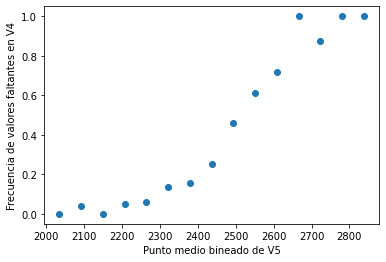

In [20]:
import matplotlib.pyplot as plt
plt.scatter(vf_V5V4['bin_centres2'], vf_V5V4['freq'])
plt.xlabel('Punto medio bineado de V5')
plt.ylabel('Frecuencia de valores faltantes en V4')
plt.show()

V5 es MNAR, V4 es MCAR y V2 MAR?

1.2.2

In [21]:
df_distrofia=pd.read_csv('DS_Bitácora_19_Distrofia.csv')

In [22]:
df_distrofia.head()

,edad,mes,año,CK,H,PK,LD,DMD
0,22.0,6.0,79.0,52.0,83.5,10.9,176.0,0
1,32.0,8.0,78.0,20.0,77.0,11.0,200.0,0
2,36.0,7.0,78.0,28.0,86.5,13.2,171.0,0
3,22.0,11.0,79.0,30.0,104.0,22.6,230.0,0
4,23.0,1.0,78.0,40.0,83.0,15.2,205.0,0


In [23]:
df_distrofia.isnull().sum()

edad    0
mes     0
año     0
CK      0
H       0
PK      0
LD      0
DMD     0
dtype: int64

In [48]:
df_distrofia.describe()

,edad,mes,año,CK,H,PK,LD,DMD
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,32.157895,6.569378,78.641148,92.260766,84.285167,-367.277512,-142.956938,0.358852
std,8.572594,2.916501,0.572134,152.895531,17.063916,1926.195428,1840.585939,0.480815
min,20.000000,1.000000,77.000000,15.000000,9.000000,-9999.000000,-9999.000000,0.000000
25%,26.000000,4.000000,78.000000,30.000000,78.000000,10.100000,145.000000,0.000000
50%,31.000000,7.000000,79.000000,41.000000,86.000000,13.000000,176.000000,0.000000
75%,36.000000,9.000000,79.000000,73.000000,93.200000,17.100000,230.000000,1.000000
max,61.000000,12.000000,80.000000,1288.000000,118.000000,110.000000,593.000000,1.000000


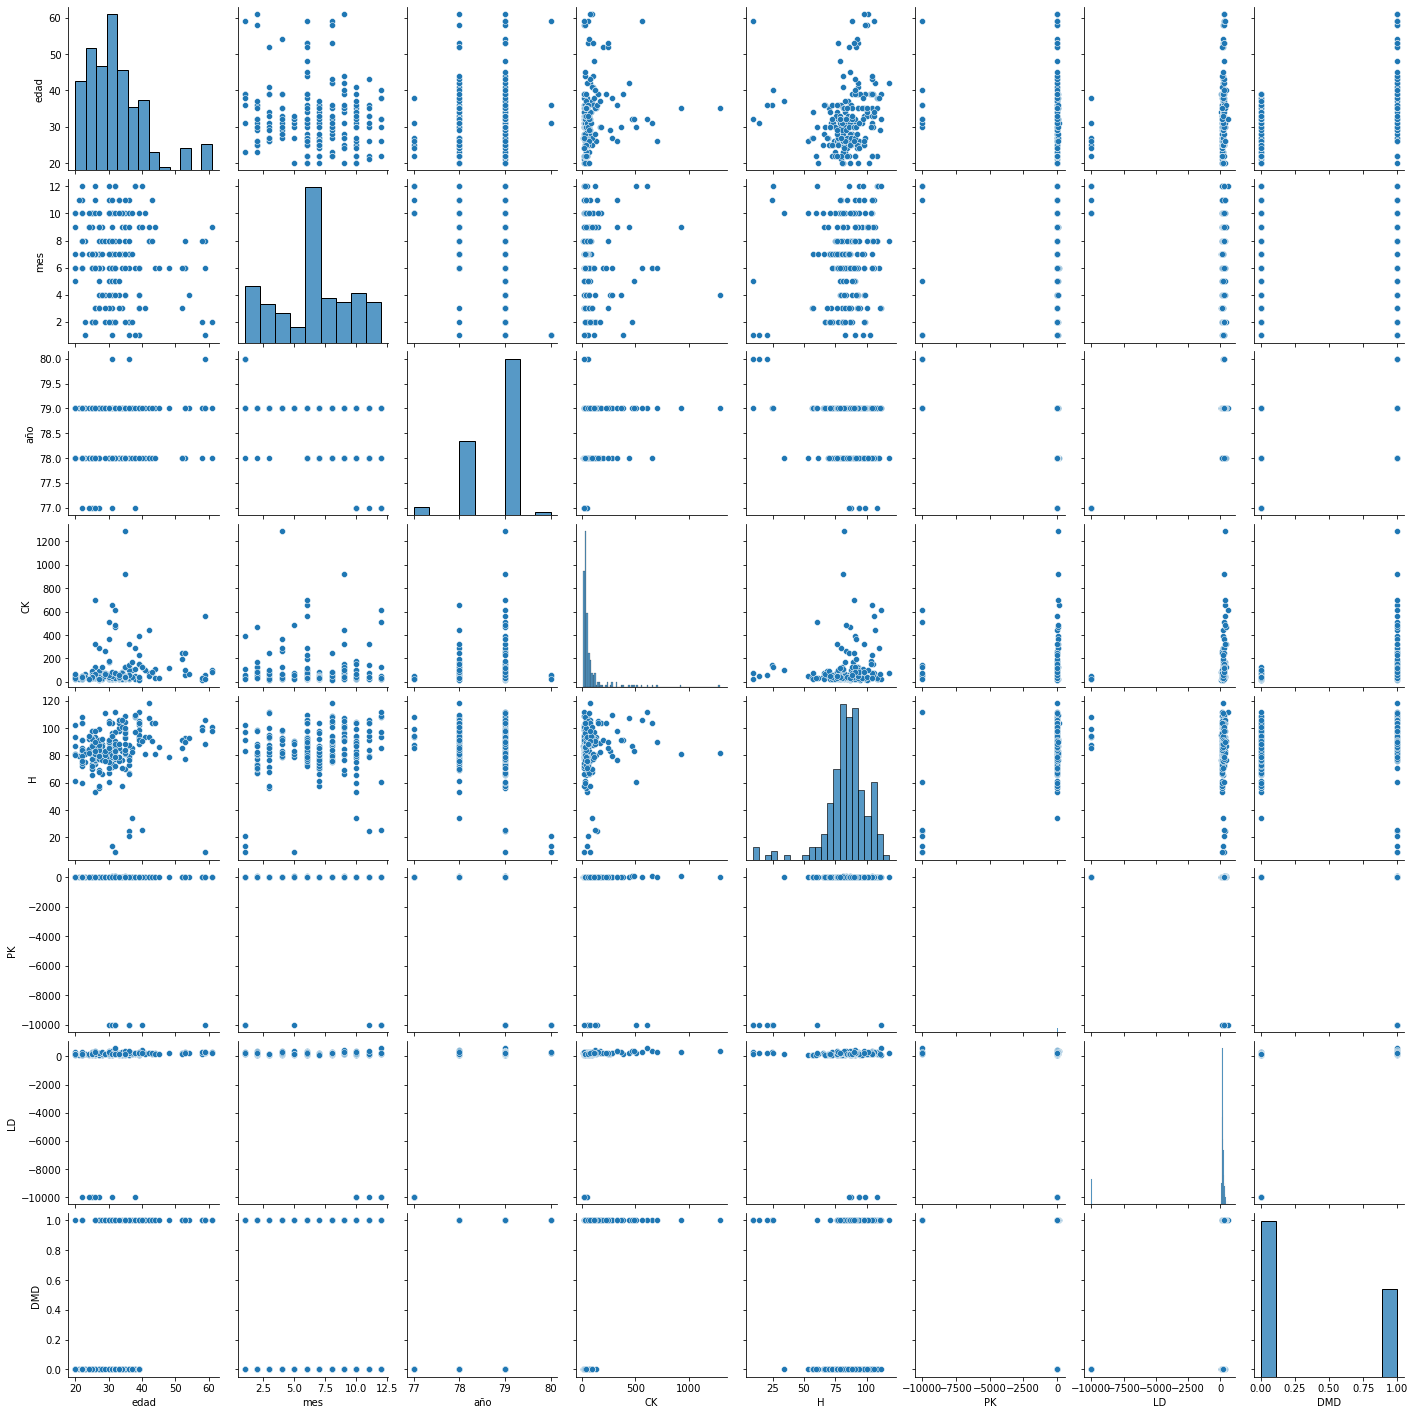

In [49]:
sns.pairplot(data=df_distrofia)

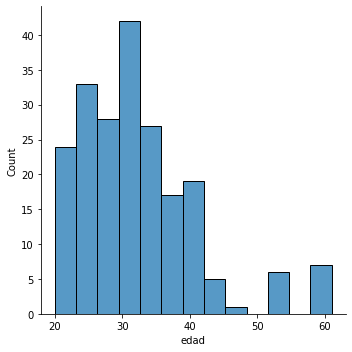

In [50]:
sns.displot(data=df_distrofia.edad)

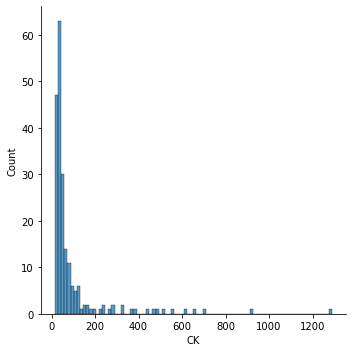

In [51]:
sns.displot(data=df_distrofia.CK)

In [73]:
sns.displot(data=df_distrofia.H)

NameError: name 'df_distrofia' is not defined

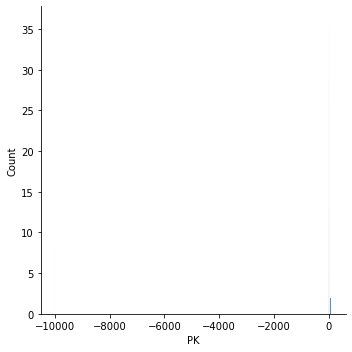

In [53]:
sns.displot(data=df_distrofia.PK)

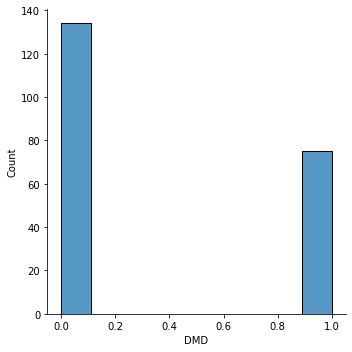

In [54]:
sns.displot(data=df_distrofia.DMD)

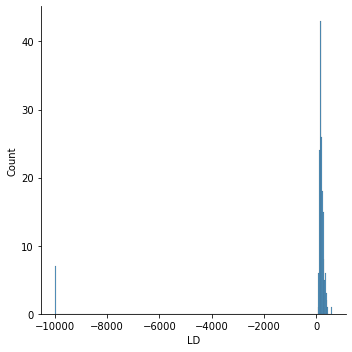

In [55]:
sns.displot(data=df_distrofia.LD)

1.2.1

In [42]:
df_sintetico=pd.read_csv('DS_Bitácora_19_Data_con_VF.csv')
df_sintetico2=pd.read_csv('DS_Bitácora_19_Data_con_VF.csv')

In [31]:
df_sintetico.head()

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357


In [32]:
df_sintetico.isnull().sum()

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64

In [33]:
df2=df_sintetico

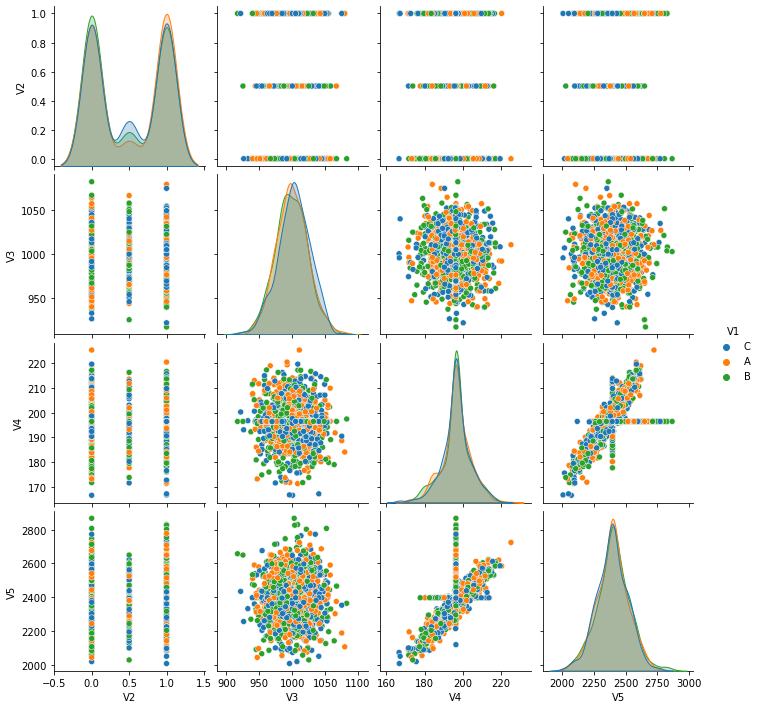

In [59]:
sns.pairplot(data=df2,hue='V1')

In [60]:
df2.V5.fillna(df2.V5.mean(),inplace=True)

In [61]:
df2.V2.fillna(df2.V2.mean(),inplace=True)

In [62]:
df2.isnull().sum()

V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64

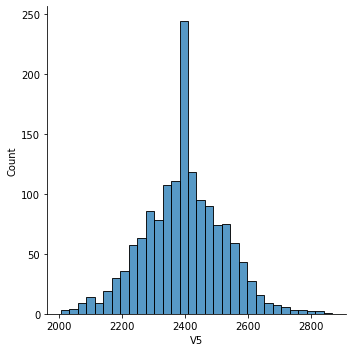

In [63]:
sns.displot(data=df2.V5)

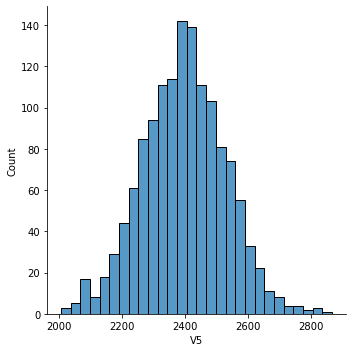

In [64]:
sns.displot(data=df_sintetico2.V5)

In [65]:
df2.V3.fillna(df2.V3.mean(),inplace=True)

In [66]:
df2.isnull().sum()

V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64

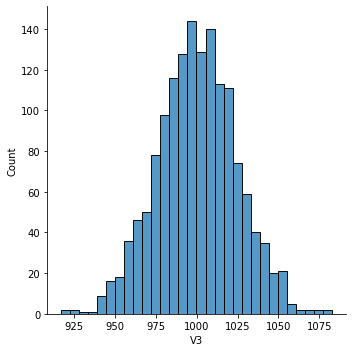

In [67]:
sns.displot(data=df2.V3)

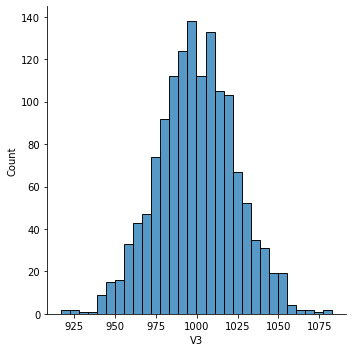

In [68]:
sns.displot(data=df_sintetico2.V3)

In [69]:
df2.V4.fillna(df2.V4.mean(),inplace=True)

In [70]:
df2.isnull().sum()

V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64

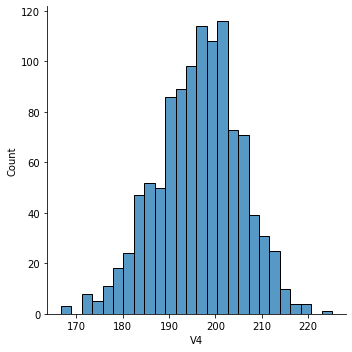

In [55]:
sns.displot(data=df_sintetico2.V4)

In [74]:
sns.displot(data=df2.V4)

TypeError: distplot() got an unexpected keyword argument 'data'

In [24]:
df2.describe

<bound method NDFrame.describe of      V1   V2           V3          V4           V5
0     C  1.0   986.175237  184.258917  2224.638050
1     C  1.0   994.130276  196.414056  2570.213101
2     A  1.0   985.782622  196.893581  2309.238832
3     A  1.0  1029.464887  192.063247  2349.259233
4     A  1.0  1004.357092  196.414056  2474.036357
...  ..  ...          ...         ...          ...
1495  C  0.0   985.188653  190.366109  2302.000694
1496  C  0.0   991.730134  193.553401  2277.045998
1497  B  0.0  1032.150519  196.414056  2347.760632
1498  C  1.0   984.522924  196.373516  2393.847484
1499  C  0.0  1017.399835  192.406202  2368.906782

[1500 rows x 5 columns]>

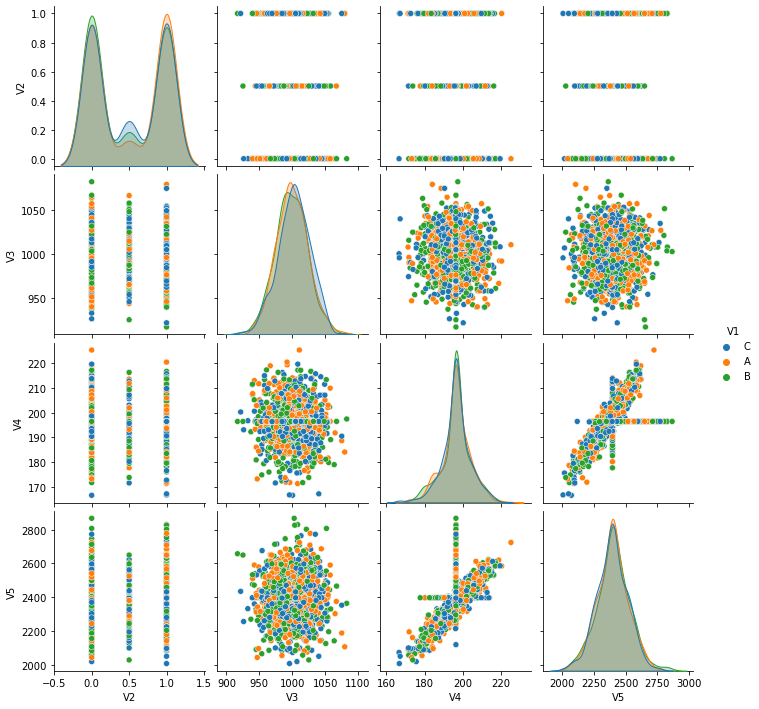

In [29]:
sns.pairplot(data=df2,hue='V1')

In [39]:
df_sintetico.describe

<bound method NDFrame.describe of      V1   V2           V3          V4           V5
0     C  1.0   986.175237  184.258917  2224.638050
1     C  1.0   994.130276         NaN  2570.213101
2     A  1.0   985.782622  196.893581  2309.238832
3     A  1.0  1029.464887  192.063247  2349.259233
4     A  1.0  1004.357092         NaN  2474.036357
...  ..  ...          ...         ...          ...
1495  C  0.0   985.188653  190.366109  2302.000694
1496  C  0.0   991.730134  193.553401  2277.045998
1497  B  0.0  1032.150519         NaN  2347.760632
1498  C  1.0   984.522924  196.373516  2393.847484
1499  C  0.0  1017.399835  192.406202  2368.906782

[1500 rows x 5 columns]>

In [71]:
df_sintetico2=pd.read_csv('DS_Bitácora_19_Data_con_VF.csv')

In [72]:
df_sintetico2.isnull().sum()

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64

**Valores Atípicos**

In [25]:
import pandas as pd
import seaborn as sns
df_va1=pd.read_csv('DS_Bitácora_19_Data_VA1.csv')

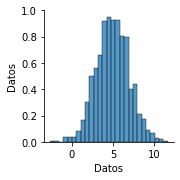

In [26]:
sns.pairplot(data=df_va1)

In [27]:
df_va1.head()

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120


In [28]:
df_va1.quantile(0.975)

Datos    8.774102
Name: 0.975, dtype: float64

In [29]:
df_va1.quantile(0.025)

Datos    1.156971
Name: 0.025, dtype: float64

<AxesSubplot:>

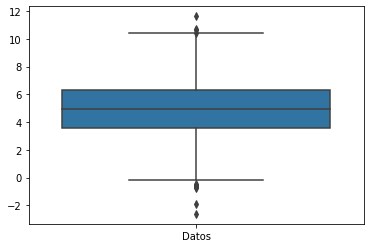

In [30]:
sns.boxplot(data=df_va1)

In [31]:
df_va1[df_va1<1.15].count()

Datos    25
dtype: int64

In [32]:
df_va1[df_va1>8.77].count()

Datos    25
dtype: int64

In [44]:
df_va1.mean()

Datos    4.952783
dtype: float64

In [45]:
df_va1.median()

Datos    4.960488
dtype: float64

In [46]:
df_va1.max()

Datos    11.628151
dtype: float64

In [47]:
df_va1.min()

Datos   -2.619781
dtype: float64

In [33]:
df_va2=pd.read_csv('DS_Bitácora_19_Data_VA2.csv')

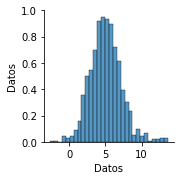

In [34]:
sns.pairplot(data=df_va2)

In [35]:
df_va2.quantile(0.975)

Datos    9.738601
Name: 0.975, dtype: float64

In [36]:
df_va2.quantile(0.025)

Datos    1.198244
Name: 0.025, dtype: float64

<AxesSubplot:>

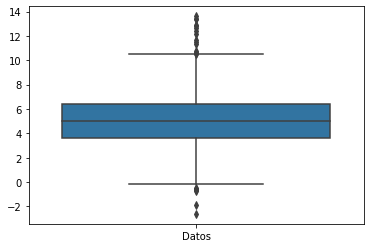

In [37]:
sns.boxplot(data=df_va2)

In [38]:
df_va2[df_va1>9.73].count()

Datos    11
dtype: int64

In [39]:
df_va2[df_va1<1.19].count()

Datos    26
dtype: int64

In [41]:
df_va2.mean()

Datos    5.059634
dtype: float64

In [42]:
df_va2.mode()

,Datos
0,-2.619781
1,-1.925574
2,-0.776018
3,-0.691831
4,-0.601945
...,...
995,12.788713
996,12.908427
997,13.348289
998,13.358959


In [43]:
df_va2.median()

Datos    4.995364
dtype: float64

In [48]:
df_va2.max()

Datos    13.613645
dtype: float64

In [49]:
df_va2.min()

Datos   -2.619781
dtype: float64

In [50]:
df_va2.std()

Datos    2.162233
dtype: float64

In [51]:
df_va1.std()

Datos    2.008023
dtype: float64

In [62]:
sigma1=df_va1.mean()+df_va1.std()*3
print(sigma1)

Datos    10.976851
dtype: float64


In [63]:
sigma11=df_va1.mean()-df_va1.std()*3
print(sigma11)

Datos   -1.071285
dtype: float64


In [64]:
sigma2=df_va2.mean()+df_va2.std()*3
print(sigma2)

Datos    11.546333
dtype: float64


In [65]:
sigma21=df_va2.mean()-df_va2.std()*3
print(sigma21)

Datos   -1.427064
dtype: float64


In [60]:
df_va1[df_va1>10.97].count()

Datos    1
dtype: int64

In [66]:
df_va1[df_va1<-1.07].count()

Datos    2
dtype: int64

In [59]:
df_va2[df_va2>11.54].count()

Datos    9
dtype: int64

In [67]:
df_va2[df_va2<-1.42].count()

Datos    2
dtype: int64

En el segundo dataset hay valores atípicos.

**3** Normalizacion

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
Scaler=StandardScaler()
Scaler.fit(df_va1)
X1_scaled=Scaler.transform(df_va1)

In [70]:
df_va1['Datos Reescalados']=X1_scaled

In [71]:
df_va1.head()

,Datos,Datos Reescalados
0,2.370556,-1.286599
1,3.437876,-0.754805
2,6.300131,0.671318
3,5.403170,0.224406
4,5.722120,0.383323


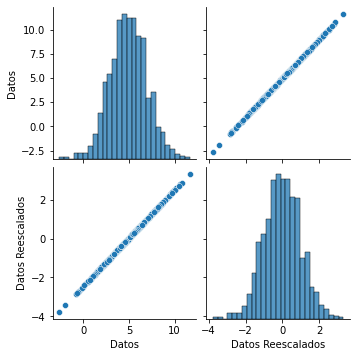

In [72]:
sns.pairplot(data=df_va1)

In [73]:
df_va1['Datos Reescalados'].mean()

1.1368683772161603e-16

In [74]:
df_va1['Datos Reescalados'].std()

1.0005003753127737

In [75]:
df_va1['Datos Reescalados'].quantile(0.975)

1.9039781328939636

In [76]:
df_va1['Datos Reescalados'].quantile(0.025)

-1.8912692372740008

In [79]:
sigma11_esc_min=df_va1['Datos Reescalados'].mean()-df_va1['Datos Reescalados'].std()*3
print(sigma11_esc_min)

-3.0015011259383213


In [80]:
sigma11_esc_max=df_va1['Datos Reescalados'].mean()+df_va1['Datos Reescalados'].std()*3
print(sigma11_esc_max)

3.0015011259383213


In [81]:
df_va1['Datos Reescalados'][df_va1['Datos Reescalados']>3.0015].count()

1

In [83]:
df_va1['Datos Reescalados'][df_va1['Datos Reescalados']<-3.0015].count()

2

In [84]:
Scaler=StandardScaler()
Scaler.fit(df_va2)
X2_scaled=Scaler.transform(df_va2)

In [85]:
df_va2['Datos Reescalados']=X2_scaled

In [86]:
df_va2.head()

,Datos,Datos Reescalados
0,2.370556,-1.244280
1,3.437876,-0.750414
2,6.300131,0.573998
3,5.403170,0.158960
4,5.722120,0.306543


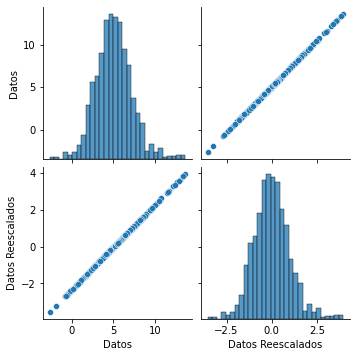

In [87]:
sns.pairplot(data=df_va2)

In [88]:
df_va2['Datos Reescalados'].quantile(0.975)

2.1650341966275355

In [89]:
df_va2['Datos Reescalados'].quantile(0.025)

-1.7867280920270283

In [90]:
sigma2_esc_min=df_va2['Datos Reescalados'].mean()-df_va2['Datos Reescalados'].std()*3
print(sigma2_esc_min)

-3.0015011259383213


In [91]:
sigma2_esc_max=df_va2['Datos Reescalados'].mean()+df_va2['Datos Reescalados'].std()*3
print(sigma2_esc_max)

3.0015011259383213


In [92]:
df_va2['Datos Reescalados'][df_va2['Datos Reescalados']>3.0015].count()

9

In [93]:
df_va2['Datos Reescalados'][df_va2['Datos Reescalados']<-3.0015].count()

2

Parte 4

In [107]:
data= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data= data.rename(columns={'l2': 'Zona', 'l1': 'País','l3':'Distrito'})
data.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
País               146660
Zona               146660
Distrito           146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

In [108]:
data1=data[['Zona','Distrito','rooms','surface_total','surface_covered','property_type','bathrooms','price']]

In [109]:
data2=data1.dropna()
data2.isnull().sum()

Zona               0
Distrito           0
rooms              0
surface_total      0
surface_covered    0
property_type      0
bathrooms          0
price              0
dtype: int64

In [110]:
data_con_dummies = pd.get_dummies(data2, drop_first=True)

In [111]:
data_con_dummies.shape

(122818, 105)

In [112]:
data.shape

(146660, 19)

In [113]:
data.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
País                object
Zona                object
Distrito            object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [114]:
data_con_dummies.dtypes

rooms                            float64
surface_total                    float64
surface_covered                  float64
bathrooms                        float64
price                            float64
                                  ...   
property_type_Local comercial      uint8
property_type_Lote                 uint8
property_type_Oficina              uint8
property_type_Otro                 uint8
property_type_PH                   uint8
Length: 105, dtype: object

In [119]:
X=data_con_dummies[data_con_dummies.columns[0:103]]
y=data_con_dummies['price']

In [120]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_con_dummies,random_state=0,train_size=0.7,test_size=0.3)

In [121]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y)

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree_regressor = DecisionTreeRegressor(max_depth=5)
tree_regressor.fit(X1_train, y1_train)
ycat_pred_train=tree_regressor.predict(X1_train)
ycat_pred_test=tree_regressor.predict(X1_test)
train3=r2_score(y1_train,ycat_pred_train)
test3=r2_score(y1_test,ycat_pred_test)
test3_r2_ajust = 1-(1-test3)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)
print("R2:",train3,test3,"R2 Ajustado:",test3_r2_ajust)

R2: 0.9971540788970326 0.7962320851297011 R2 Ajustado: 0.7955462220784401


In [123]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_con_dummies,train_size=0.7,test_size=0.3)

In [124]:
X12_train,X12_test,y12_train,y12_test=train_test_split(X,y)

In [127]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
z4=[]
z5=[]
for i in range(1,20):
    tree_regressor = DecisionTreeRegressor(max_depth=i)
    tree_regressor.fit(X1_train, y1_train)
    ycat_pred_train=tree_regressor.predict(X1_train)
    ycat_pred_test=tree_regressor.predict(X1_test)
    z4.append(r2_score(y1_train,ycat_pred_train))
    z5.append(r2_score(y1_test,ycat_pred_test))

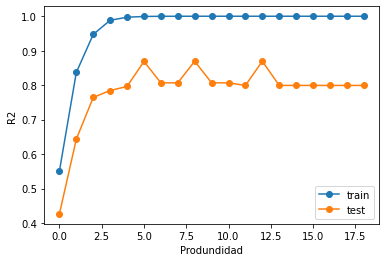

In [128]:
import matplotlib.pyplot as plt
plt.plot(z4,'o-',label='train' )
plt.plot(z5,'o-',label='test')
plt.legend()
plt.xlabel('Produndidad')
plt.ylabel('R2')
pd.set_option('display.float_format', lambda x: '%.5f' % x)